**Welcome to your first assignment of Summer Analytics 2023! We hope you are excited to implement and test everything you have learnt up until now.<a href = "https://drive.google.com/file/d/1U73P58VAc4EXM98Or9feKnVx9I9FOP_L/view?usp=sharing"> The dataset</a> which you'll use includes information about Movies.**

 We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!
 
Let's get started with importing numpy, pandas, seaborn and matplotlib! 

Note - matplotlib should be imported with the command :

**import matplotlib.pyplot as plt**

Start by importing all important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

Read the csv file and assign it to a variable .

In [2]:
file_path = "Dataset/imdb_top_1000.csv"
data = pd.read_csv(file_path)
data.head(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


Display shape of dataframe

In [3]:
shape=data.shape
print("Number of row: ",shape[0])
print("Number of columns: ",shape[1])

Number of row:  1000
Number of columns:  16


Print all columns of dataframe

In [4]:
col=data.columns
print("Total Number of columns: ",len(col))
for name in col:
    print(name)

Total Number of columns:  16
Poster_Link
Series_Title
Released_Year
Certificate
Runtime
Genre
IMDB_Rating
Overview
Meta_score
Director
Star1
Star2
Star3
Star4
No_of_Votes
Gross


Remove the column 'Poster_Link' and update the dataframe.

In [6]:
data = pd.read_csv(file_path)
#type->1
#del data['Poster_Link']
#type->2
data.drop('Poster_Link',axis=1,inplace=True)
data.head(1)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


Set the 'Series_Title' column as the index of dataframe

In [7]:
data = pd.read_csv(file_path)
data.set_index('Series_Title', inplace=True)
data.head(1)

,Poster_Link,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
Series_Title,,,,,,,,,,,,,,,
The Shawshank Redemption,https://m.media-amazon.com/images/M/MV5BMDFkYT...,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


Print a list of all the unique Genre

In [8]:
with open(file_path,"r",encoding='utf-8') as file_obj:
    data=csv.DictReader(file_obj)
    s=set()
    for row in data:
        string=row['Genre']
        l=list(string.split(', '))
        for name in l:
            s.add(name)
print("Total Number of unique Genre: ",len(s))
for name in s:
    print(name)

Total Number of unique Genre:  21
Western
Romance
Fantasy
Adventure
War
Mystery
Biography
Sport
Horror
Music
Comedy
Crime
Family
Thriller
History
Film-Noir
Drama
Animation
Action
Musical
Sci-Fi


1. What is the Number of Directors in the given dataset ? 

In [9]:
#method-1
with open(file_path,"r",encoding='utf-8') as file_obj:
    data=csv.DictReader(file_obj)
    s=set()
    for row in data:
        s.add(row['Director'])
print("Number of Directors:",len(s))

Number of Directors: 548


In [10]:
#method-2
data = pd.read_csv(file_path)
num_directors = data['Director'].nunique()
print("Number of Directors:",num_directors)

Number of Directors: 548


2. What is the mean, median and standard deviation of IMDB rating in the dataset ?

In [11]:
data = pd.read_csv(file_path)
imdb_rating=data['IMDB_Rating']
print("Mean of IMDB rating:",imdb_rating.mean())
print("Median of IMDB rating:",imdb_rating.median())
print("Standard Deviation of IMDB rating:",imdb_rating.std())

Mean of IMDB rating: 7.949300000000012
Median of IMDB rating: 7.9
Standard Deviation of IMDB rating: 0.27549120749200917


3. Which director has directed the most number of movies?

In [12]:
#Method-1
with open(file_path,"r",encoding='utf-8') as file_obj:
    data=csv.DictReader(file_obj)
    d={}
    for row in data:
        d[row['Director']]=d.get(row['Director'],0)+1
director=list(d.keys())
number_of_movies=list(d.values())
max_index = number_of_movies.index(max(number_of_movies))
print(director[max_index],"has directed the most number of movies, number of movies:",number_of_movies[max_index])

Alfred Hitchcock has directed the most number of movies, number of movies: 14


In [13]:
#mehtod-2
data = pd.read_csv(file_path)
director_counts = data['Director'].value_counts()
top_director=director_counts.head(1)
top_director

Alfred Hitchcock    14
Name: Director, dtype: int64

4. Name the Movie which has the highest Runtime ?

In [14]:
file_path = "Dataset/imdb_top_1000.csv"
with open(file_path,"r",encoding='utf-8') as file_obj:
    data=csv.DictReader(file_obj)
    time=[]
    for row in data:
        runtime=list(row['Runtime'].split(" "))
        t=runtime[0]
        time.append(int(t))
time_series = pd.Series(time)
max_runtime_index = time_series.idxmax()
data = pd.read_csv(file_path)
series_title=data['Series_Title']
print("Movie which has the highest Runtime is:",series_title[max_runtime_index])

Movie which has the highest Runtime is: Gangs of Wasseypur


5. How many movies are released after year 2000 and have IMDB rating > 8.5 ?

In [15]:
#method-1
file_path = "Dataset/imdb_top_1000.csv"
data = pd.read_csv(file_path)
year_str=data['Released_Year']
year = []
for x in year_str:
    try:
        year.append(int(x))
    except ValueError:
        year.append(0)
imdb=data['IMDB_Rating']
count=0
for i in range(1000):
    if(year[i]>=2000 and imdb[i]>8.5):
        count+=1
print(count,"movies are released after year 2000 and have IMDB rating > 8.5")

11 movies are released after year 2000 and have IMDB rating > 8.5


In [16]:
#method-2
data = pd.read_csv(file_path)
data['Released_Year'] = pd.to_numeric(data['Released_Year'],errors='coerce')
filtered_data = data[(data['Released_Year'] > 2000) & (data['IMDB_Rating'] > 8.5)]
num_movies = filtered_data.shape[0]
print(num_movies,"movies are released after year 2000 and have IMDB rating > 8.5")

11 movies are released after year 2000 and have IMDB rating > 8.5


Using seaborn make different types of plots, observe the trend and answer the questions.
6. Make a countplot of Movies directed by top 5 directors.

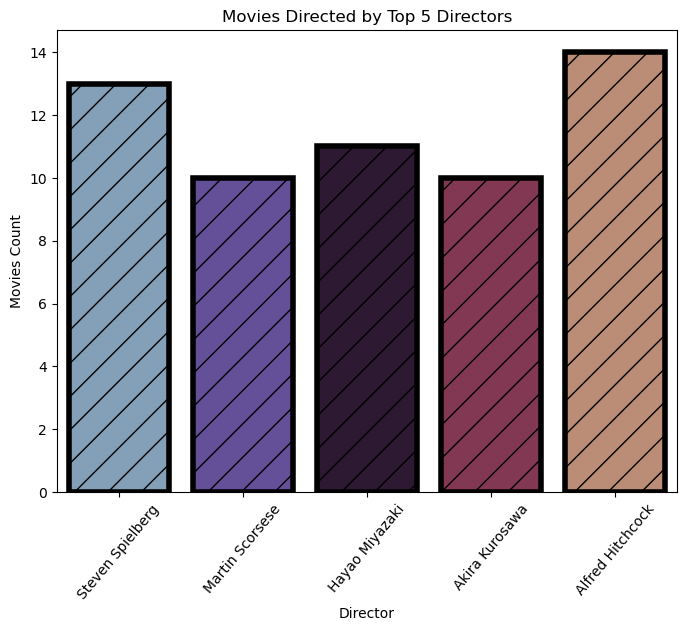

In [17]:
data = pd.read_csv(file_path)
director_counts=data['Director'].value_counts()
top_directors=director_counts.head(5)
plt.figure(figsize=(8,6))
sns.countplot(data=data[data['Director'].isin(top_directors.index)], x='Director',lw=4,ec='black',hatch='/',palette='twilight')
plt.xlabel('Director')
plt.ylabel('Movies Count')
plt.title('Movies Directed by Top 5 Directors')
plt.xticks(rotation=50)
plt.show()

7. Make a plot to analyze distribution of IMDB rating?

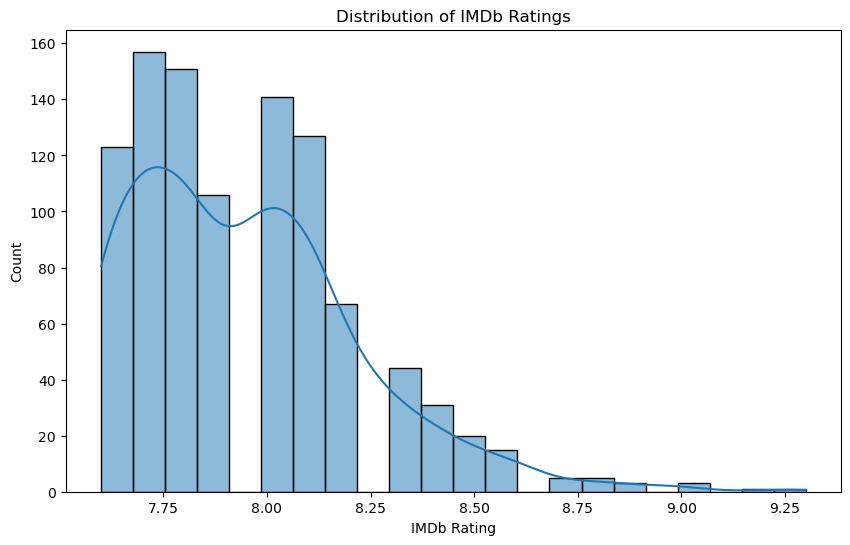

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='IMDB_Rating', kde=True)
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.title('Distribution of IMDb Ratings')
plt.show()

8. What type of Genre has the highest IMDB rating?

In [19]:
data = pd.read_csv(file_path)
imdb=data['IMDB_Rating']
index=imdb.argmax()
genre=data['Genre']
print(genre[index],"is Genre of highest IMDB rating")

Drama is Genre of highest IMDB rating


9. Name the top 5 movies that have earned highest Meta score. 

In [20]:
data = pd.read_csv(file_path)
data_meta_top_5=data.nlargest(5,'Meta_score')[['Series_Title','Meta_score']].set_index('Series_Title')
print(data_meta_top_5)

                    Meta_score
Series_Title                  
The Godfather            100.0
Casablanca               100.0
Rear Window              100.0
Lawrence of Arabia       100.0
Vertigo                  100.0


10. Of which Genre movie has the highest Runtime?

In [21]:
file_path = "Dataset/imdb_top_1000.csv"
with open(file_path,"r",encoding='utf-8') as file_obj:
    data=csv.DictReader(file_obj)
    time=[]
    for row in data:
        runtime=list(row['Runtime'].split(" "))
        t=runtime[0]
        time.append(int(t))
time_series = pd.Series(time)
max_runtime_index = time_series.idxmax()
data = pd.read_csv(file_path)
genre=data['Genre']
print("Genre of Movie which has the highest Runtime is:",genre[max_runtime_index])

Genre of Movie which has the highest Runtime is: Action, Comedy, Crime


**Using the knowledge about Plotly that you have  try making plots and analyse the data .Whenever you come across an interesting analysis please show the corresponding plot(using Plotly) and comment down your analysis for the same**

In [22]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [23]:
data = pd.read_csv(file_path)

In [24]:
px.histogram(data, x="IMDB_Rating" ,marginal='violin',
            color_discrete_sequence=['green'])

In [25]:
px.histogram(data, x="Meta_score")

In [26]:
px.violin(data, y="IMDB_Rating", box=True, points='all')

In [27]:
px.violin(data, y="Meta_score", box=True, points='all')

In [28]:
px.scatter(data, x="IMDB_Rating", y="Meta_score", hover_data=['Series_Title'])

In [29]:
px.scatter(data, x="IMDB_Rating", y="No_of_Votes", hover_data=['Series_Title'])

## Submitted by: Yashwin Tapdiya
## email: yashwintapdiya@gmail.com